In [4]:
import torch
import torch.nn.functional as F

from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import Resize, Compose, ToTensor, Normalize

import argparse
import os
import math 
import skimage
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import time
import pickle

from datetime import datetime
from pathlib import Path

# from data_classes.py_files.custom_datasets import *
# from data_classes.py_files.data_classes import *
from data_classes.py_files.new_dataset import *

from model_classes.py_files.cnn_model import *
from model_classes.py_files.pigan_model import *

from functions import *

# %matplotlib qt

In [13]:
def show_runs(requirements, print_vars):
    for run in sorted(os.listdir(path='saved_runs')):
        if run != "old":

            ARGS = load_args(run, print_changed=False)

            if all([requirements[key] == vars(ARGS)[key] for key in requirements.keys()]):

                print(f"\n{run}\n")

                for key, item in vars(ARGS).items():
                    if key in print_vars:
                        print(f"{key}: {item}")

                print()

                losses = np.load(f'saved_runs/{run}/losses.npy')
        #         pcmra_losses = np.load(f'saved_runs/{run}/pcmra_losses.npy')
                dice_losses = np.load(f'saved_runs/{run}/dice_losses.npy')

                eps, t_losses, v_losses = losses[:, 0], losses[:, 1], losses[:, 3]
    #             t_pcmra_losses, v_pcmra_losses = pcmra_losses[:, 1], pcmra_losses[:, 3]
                t_dice_losses, v_dice_losses = dice_losses[:, 1], dice_losses[:, 3]

                i1, i2 = t_losses.argmin(), v_losses.argmin()
                i3, i4 = t_dice_losses.argmin(), v_dice_losses.argmin()

                print(f"Lowest train loss at epoch {int(eps[i1])}:\t{round(t_losses[i1], 4)}")
                print(f"Lowest eval  loss at epoch {int(eps[i2])}:\t{round(v_losses[i2], 4)}")
                print()
                print(f"Lowest train dice loss at epoch {int(eps[i3])}:\t{round(t_dice_losses[i3], 4)}")
                print(f"Lowest eval  dice loss at epoch {int(eps[i4])}:\t{round(v_dice_losses[i4], 4)}")

                fig, axes = plt.subplots(1, 3, figsize=(18,5))
                fig.patch.set_facecolor('white')

                axes[0].plot(eps[1:], t_losses[1:], label='Train loss')
                axes[0].plot(eps[1:], v_losses[1:], label='Eval loss')
                axes[0].set_title('Mask Loss')

                axes[1].imshow(plt.imread(f'saved_runs/{run}/pcmra_loss_plot.png'))
        #         axes[1].plot(eps[1:], t_pcmra_losses[1:], label='Train loss')
        #         axes[1].plot(eps[1:], v_pcmra_losses[1:], label='Eval loss')
                axes[1].set_title('PCMRA Loss')

                axes[2].plot(eps[1:], t_dice_losses[1:], label='Train dice loss')
                axes[2].plot(eps[1:], v_dice_losses[1:], label='Eval dice loss')
                axes[2].set_title('Dice Loss')

                plt.show()

                print("\n\n\n")



pi-gan 03-05-2021 12:25:53 

reconstruction: pcmra
share_mapping: False
pcmra_lambda: 1
batch_size: 24
n_coords_sample: 5000
cnn_setup: 1
mapping_setup: 1

Lowest train loss at epoch 50:	0.0237
Lowest eval  loss at epoch 25:	0.0477

Lowest train dice loss at epoch 50:	0.1663
Lowest eval  dice loss at epoch 40:	0.3544


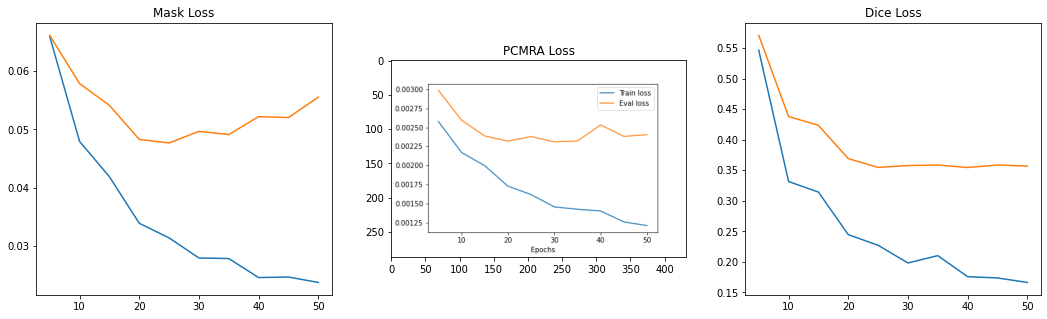






pi-gan 03-05-2021 13:13:07 

reconstruction: pcmra
share_mapping: False
pcmra_lambda: 10
batch_size: 24
n_coords_sample: 5000
cnn_setup: 1
mapping_setup: 1

Lowest train loss at epoch 50:	0.0229
Lowest eval  loss at epoch 20:	0.0528

Lowest train dice loss at epoch 50:	0.162
Lowest eval  dice loss at epoch 45:	0.373


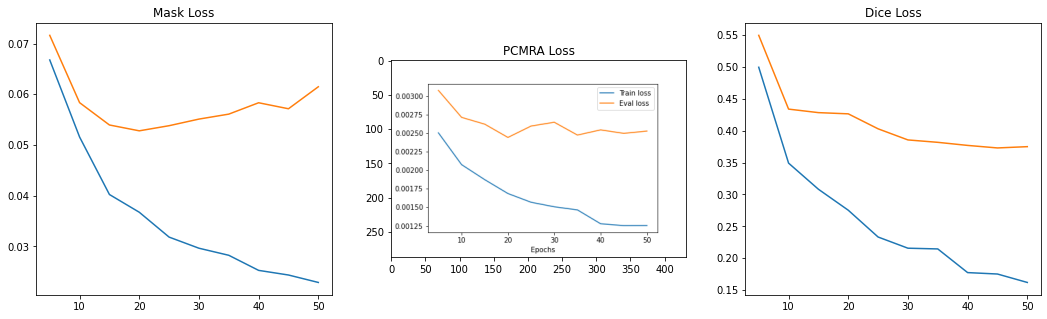






pi-gan 03-05-2021 16:50:03 

reconstruction: pcmra
share_mapping: True
pcmra_lambda: 1
batch_size: 24
n_coords_sample: 5000
cnn_setup: 1
mapping_setup: 1

Lowest train loss at epoch 50:	0.03
Lowest eval  loss at epoch 30:	0.0651

Lowest train dice loss at epoch 50:	0.2247
Lowest eval  dice loss at epoch 45:	0.4043


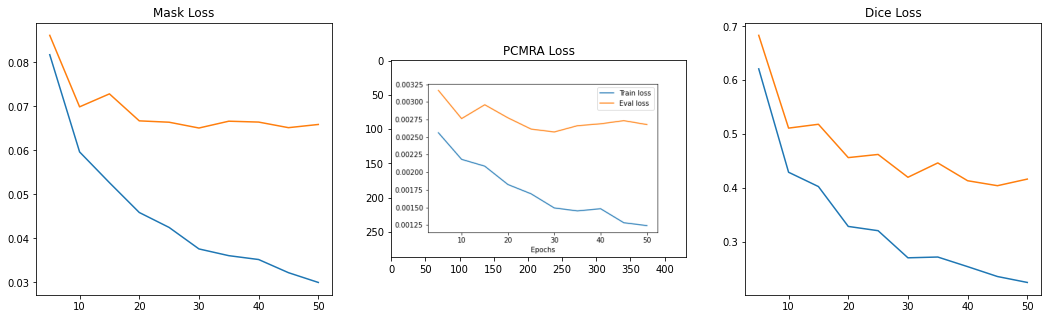






pi-gan 03-05-2021 17:37:11 

reconstruction: pcmra
share_mapping: True
pcmra_lambda: 10
batch_size: 24
n_coords_sample: 5000
cnn_setup: 1
mapping_setup: 1

Lowest train loss at epoch 50:	0.0306
Lowest eval  loss at epoch 40:	0.0503

Lowest train dice loss at epoch 50:	0.2281
Lowest eval  dice loss at epoch 45:	0.3531


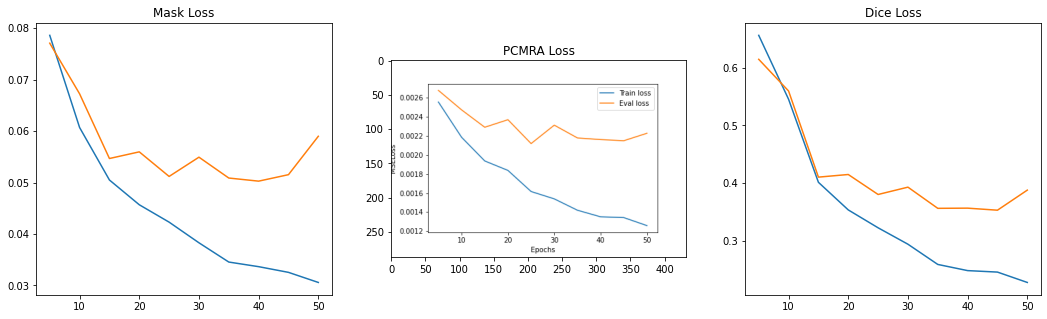






pi-gan 03-05-2021 20:36:38 

reconstruction: pcmra
share_mapping: False
pcmra_lambda: 1
batch_size: 24
n_coords_sample: 5000
cnn_setup: 1
mapping_setup: 2

Lowest train loss at epoch 50:	0.0216
Lowest eval  loss at epoch 20:	0.0596

Lowest train dice loss at epoch 50:	0.1632
Lowest eval  dice loss at epoch 40:	0.3593


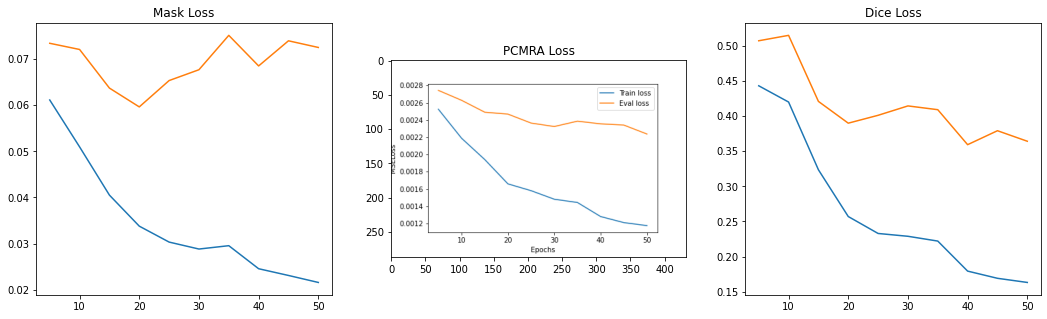






pi-gan 03-05-2021 21:23:56 

reconstruction: pcmra
share_mapping: False
pcmra_lambda: 10
batch_size: 24
n_coords_sample: 5000
cnn_setup: 1
mapping_setup: 2

Lowest train loss at epoch 50:	0.0218
Lowest eval  loss at epoch 30:	0.0439

Lowest train dice loss at epoch 50:	0.1599
Lowest eval  dice loss at epoch 45:	0.2682


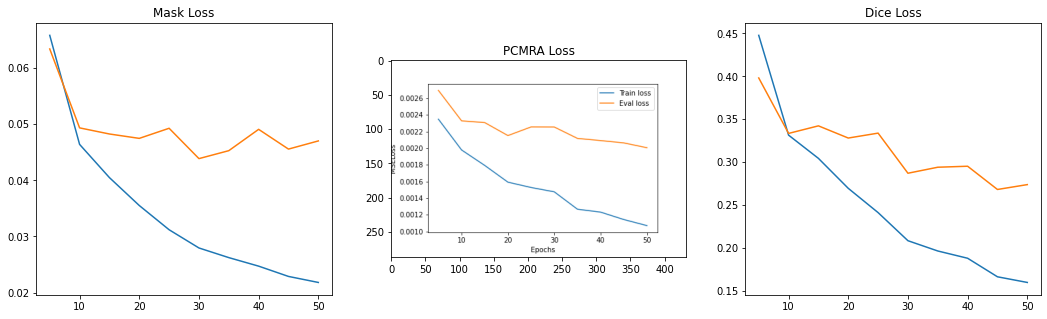






pi-gan 04-05-2021 01:01:32 

reconstruction: pcmra
share_mapping: True
pcmra_lambda: 1
batch_size: 24
n_coords_sample: 5000
cnn_setup: 1
mapping_setup: 2

Lowest train loss at epoch 50:	0.033
Lowest eval  loss at epoch 40:	0.0444

Lowest train dice loss at epoch 50:	0.2444
Lowest eval  dice loss at epoch 40:	0.3481


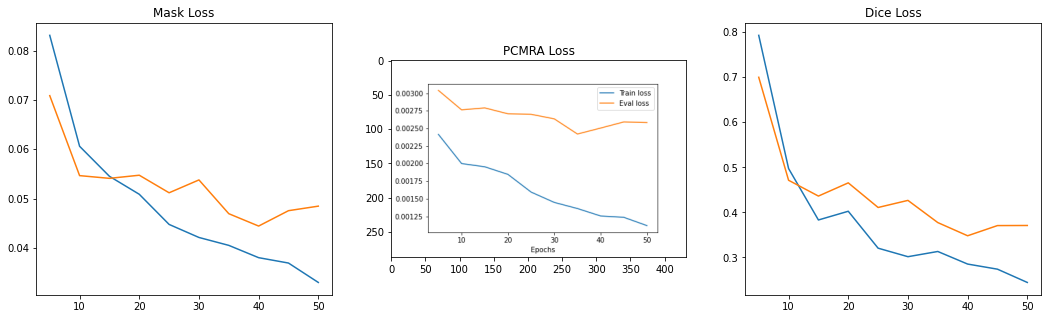






pi-gan 04-05-2021 01:48:08 

reconstruction: pcmra
share_mapping: True
pcmra_lambda: 10
batch_size: 24
n_coords_sample: 5000
cnn_setup: 1
mapping_setup: 2

Lowest train loss at epoch 50:	0.0316
Lowest eval  loss at epoch 25:	0.0545

Lowest train dice loss at epoch 50:	0.232
Lowest eval  dice loss at epoch 50:	0.3812


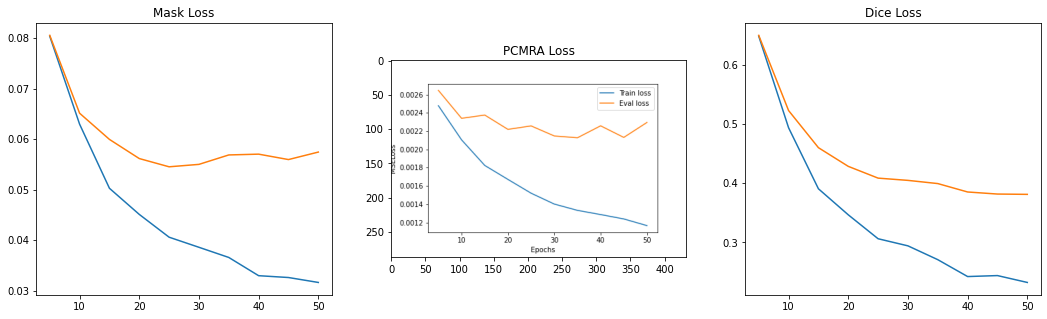






pi-gan 04-05-2021 05:24:02 

reconstruction: pcmra
share_mapping: False
pcmra_lambda: 1
batch_size: 24
n_coords_sample: 5000
cnn_setup: 2
mapping_setup: 3

Lowest train loss at epoch 50:	0.0237
Lowest eval  loss at epoch 20:	0.0543

Lowest train dice loss at epoch 50:	0.1723
Lowest eval  dice loss at epoch 35:	0.3525


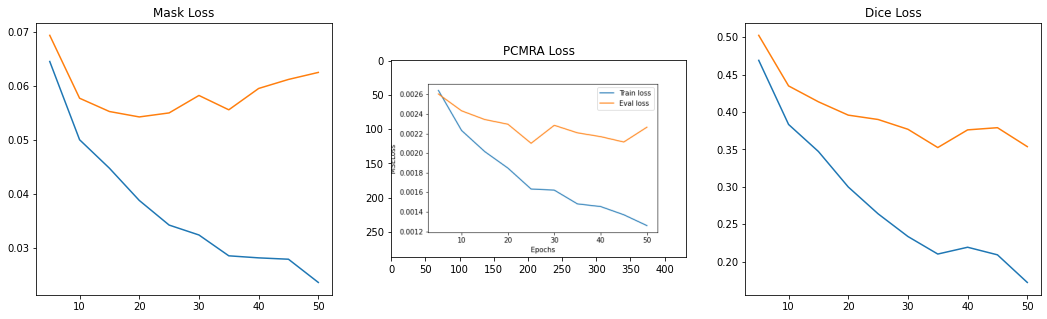






pi-gan 04-05-2021 06:10:53 

reconstruction: pcmra
share_mapping: False
pcmra_lambda: 10
batch_size: 24
n_coords_sample: 5000
cnn_setup: 2
mapping_setup: 3

Lowest train loss at epoch 50:	0.0258
Lowest eval  loss at epoch 20:	0.0482

Lowest train dice loss at epoch 50:	0.194
Lowest eval  dice loss at epoch 50:	0.3613


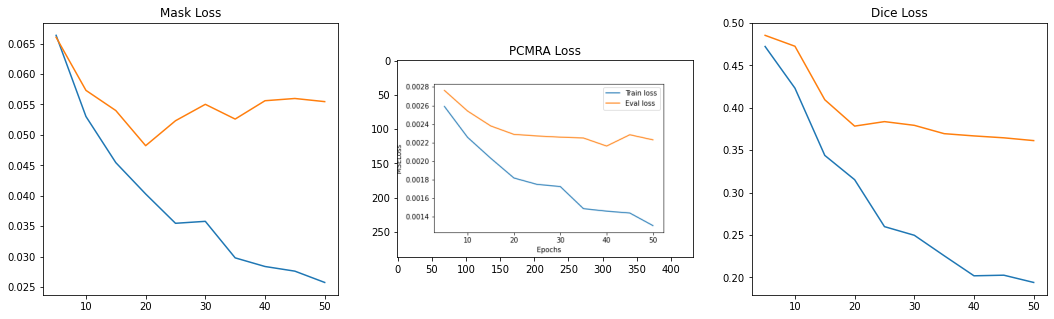






pi-gan 04-05-2021 09:46:50 

reconstruction: pcmra
share_mapping: True
pcmra_lambda: 1
batch_size: 24
n_coords_sample: 5000
cnn_setup: 2
mapping_setup: 3

Lowest train loss at epoch 45:	0.0308
Lowest eval  loss at epoch 45:	0.044

Lowest train dice loss at epoch 45:	0.2415
Lowest eval  dice loss at epoch 45:	0.3335


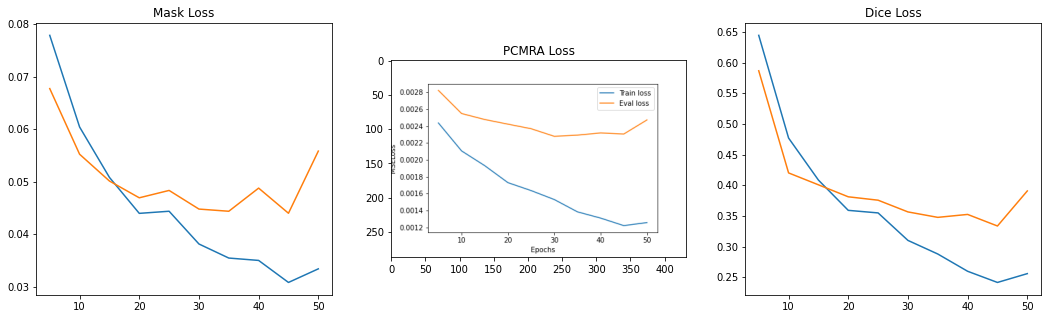






pi-gan 04-05-2021 10:34:13 

reconstruction: pcmra
share_mapping: True
pcmra_lambda: 10
batch_size: 24
n_coords_sample: 5000
cnn_setup: 2
mapping_setup: 3

Lowest train loss at epoch 50:	0.0328
Lowest eval  loss at epoch 50:	0.0453

Lowest train dice loss at epoch 50:	0.2439
Lowest eval  dice loss at epoch 50:	0.3435


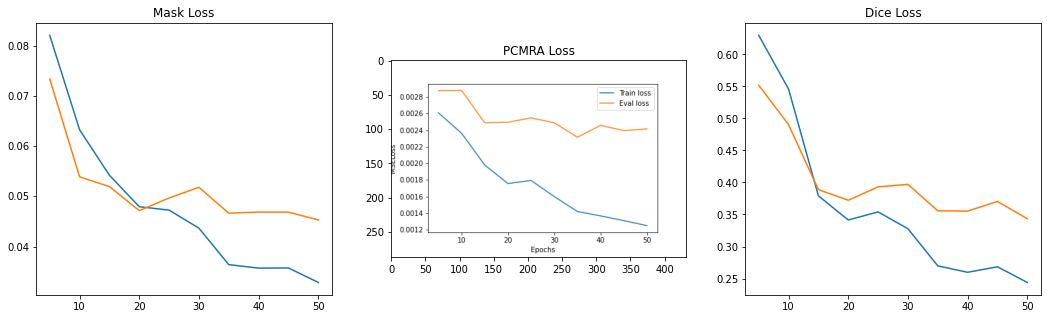






pi-gan 04-05-2021 14:15:54 

reconstruction: pcmra
share_mapping: False
pcmra_lambda: 1
batch_size: 24
n_coords_sample: 5000
cnn_setup: 2
mapping_setup: 4

Lowest train loss at epoch 50:	0.0241
Lowest eval  loss at epoch 25:	0.054

Lowest train dice loss at epoch 50:	0.1808
Lowest eval  dice loss at epoch 50:	0.3909


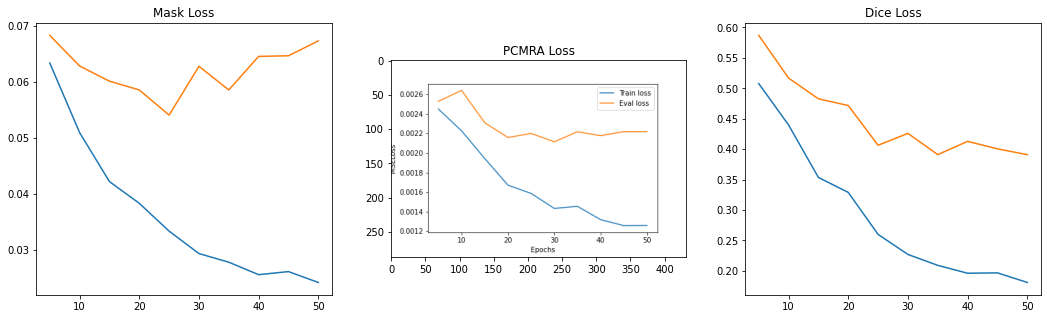






pi-gan 04-05-2021 15:02:57 

reconstruction: pcmra
share_mapping: False
pcmra_lambda: 10
batch_size: 24
n_coords_sample: 5000
cnn_setup: 2
mapping_setup: 4

Lowest train loss at epoch 50:	0.0232
Lowest eval  loss at epoch 30:	0.0513

Lowest train dice loss at epoch 50:	0.1671
Lowest eval  dice loss at epoch 50:	0.3369


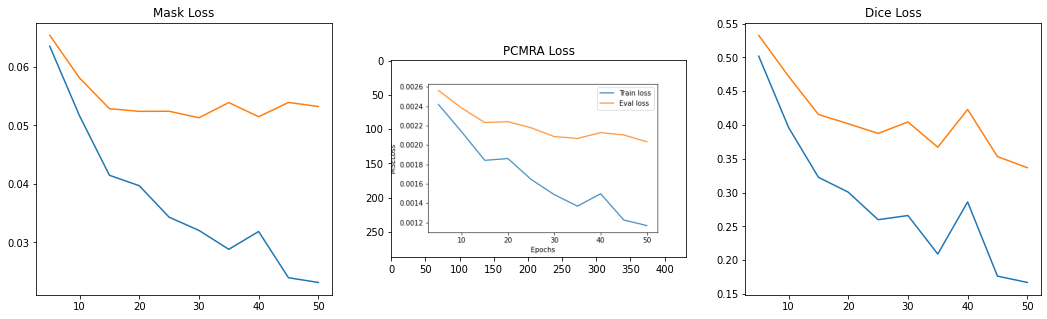






pi-gan 04-05-2021 18:43:05 

reconstruction: pcmra
share_mapping: True
pcmra_lambda: 1
batch_size: 24
n_coords_sample: 5000
cnn_setup: 2
mapping_setup: 4

Lowest train loss at epoch 50:	0.0324
Lowest eval  loss at epoch 45:	0.0503

Lowest train dice loss at epoch 50:	0.2318
Lowest eval  dice loss at epoch 50:	0.3678


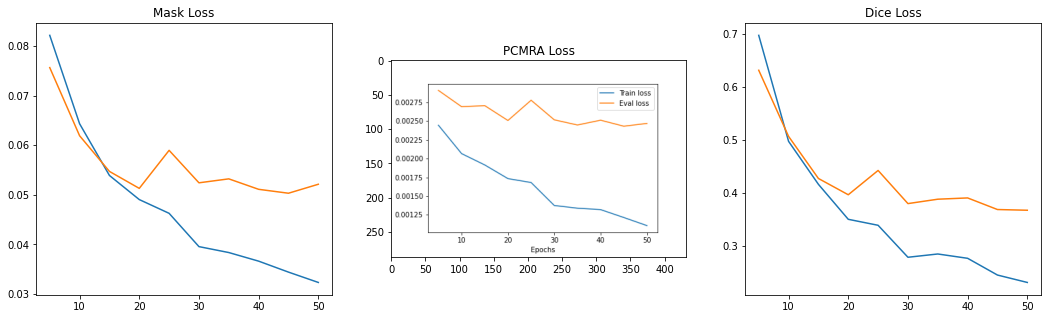






pi-gan 04-05-2021 19:30:41 

reconstruction: pcmra
share_mapping: True
pcmra_lambda: 10
batch_size: 24
n_coords_sample: 5000
cnn_setup: 2
mapping_setup: 4

Lowest train loss at epoch 45:	0.034
Lowest eval  loss at epoch 30:	0.0475

Lowest train dice loss at epoch 50:	0.2467
Lowest eval  dice loss at epoch 25:	0.3683


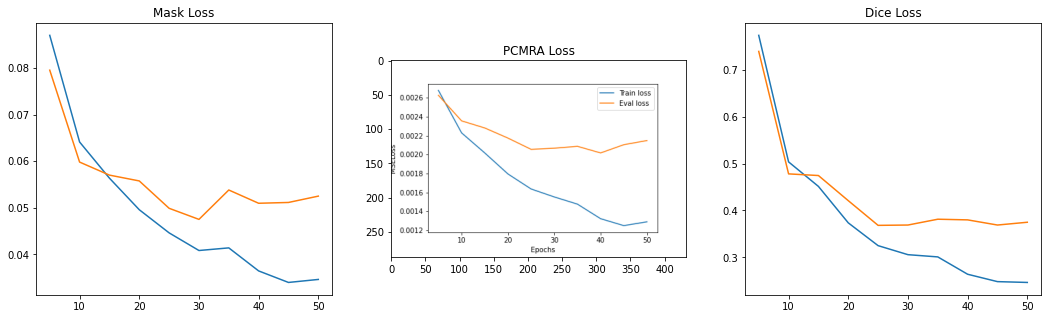






pi-gan 06-05-2021 11:23:14 very trained pcmra

reconstruction: pcmra
share_mapping: False
pcmra_lambda: 1
batch_size: 2
n_coords_sample: -1
cnn_setup: 1
mapping_setup: 2

Lowest train loss at epoch 10:	0.0901
Lowest eval  loss at epoch 10:	0.0952

Lowest train dice loss at epoch 20:	0.947
Lowest eval  dice loss at epoch 20:	0.9432


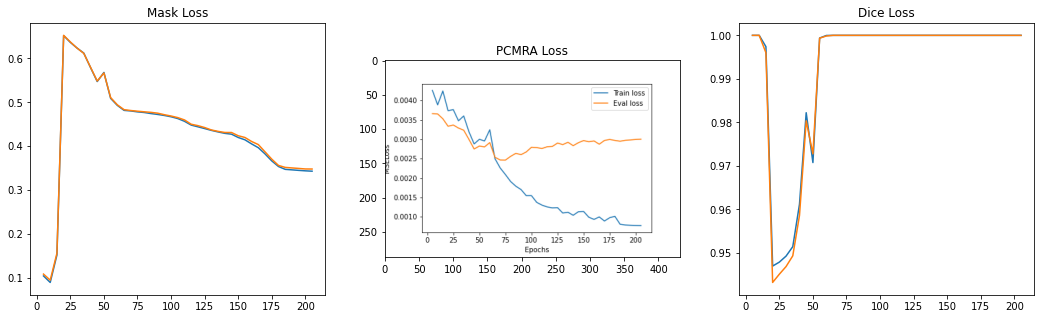






pi-gan 06-05-2021 15:37:44 very trained pcmra_allright train seg

reconstruction: pcmra
share_mapping: False
pcmra_lambda: 1
batch_size: 12
n_coords_sample: 20000
cnn_setup: 1
mapping_setup: 2

Lowest train loss at epoch 225:	0.0129
Lowest eval  loss at epoch 75:	0.0773

Lowest train dice loss at epoch 225:	0.0674
Lowest eval  dice loss at epoch 100:	0.4239


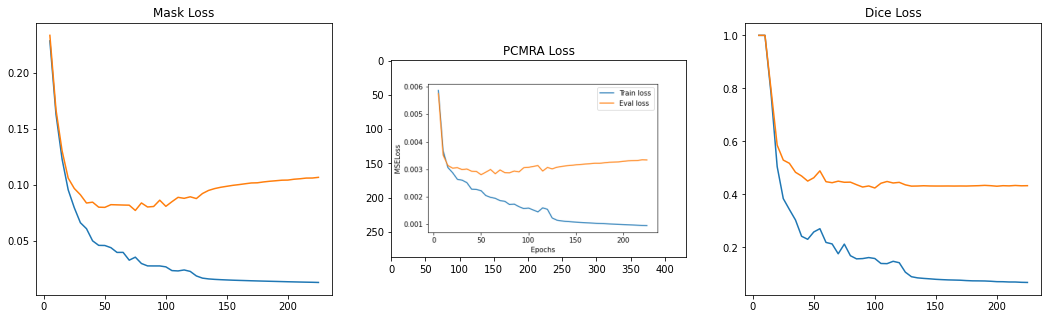






pi-gan 06-05-2021 15:58:24 

reconstruction: pcmra
share_mapping: False
pcmra_lambda: 1
batch_size: 12
n_coords_sample: 20000
cnn_setup: 1
mapping_setup: 2

Lowest train loss at epoch 220:	0.0451
Lowest eval  loss at epoch 210:	0.0612

Lowest train dice loss at epoch 225:	0.3227
Lowest eval  dice loss at epoch 185:	0.4195


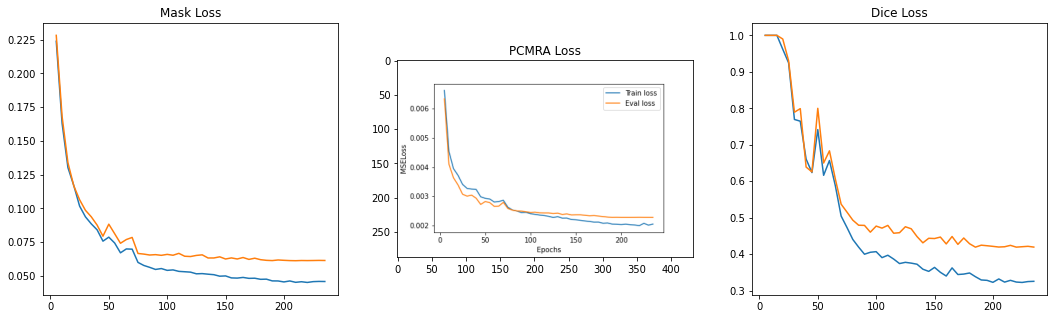






pi-gan 06-05-2021 16:56:52  l1loss

reconstruction: pcmra
share_mapping: False
pcmra_lambda: 1
batch_size: 12
n_coords_sample: 20000
cnn_setup: 1
mapping_setup: 2

Lowest train loss at epoch 365:	0.0442
Lowest eval  loss at epoch 105:	0.067

Lowest train dice loss at epoch 365:	0.3386
Lowest eval  dice loss at epoch 480:	0.4829


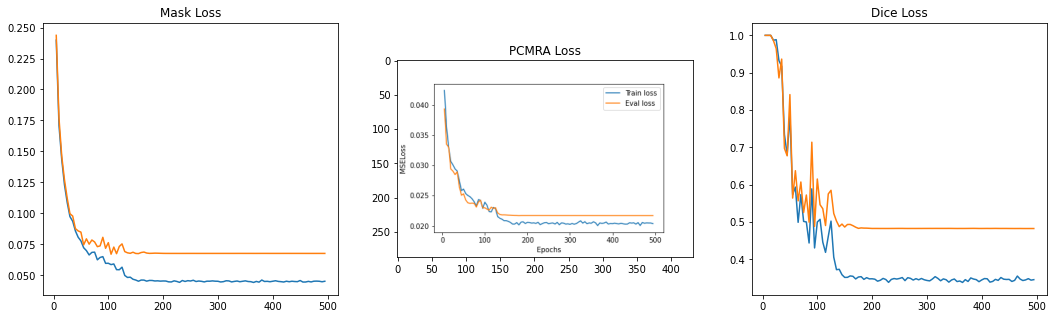






pi-gan 06-05-2021 18:17:55 pcmra _ val mask 0.36_ translate true

reconstruction: pcmra
share_mapping: False
pcmra_lambda: 1
batch_size: 12
n_coords_sample: 20000
cnn_setup: 1
mapping_setup: 2

Lowest train loss at epoch 240:	0.0346
Lowest eval  loss at epoch 175:	0.0563

Lowest train dice loss at epoch 260:	0.2552
Lowest eval  dice loss at epoch 260:	0.3685


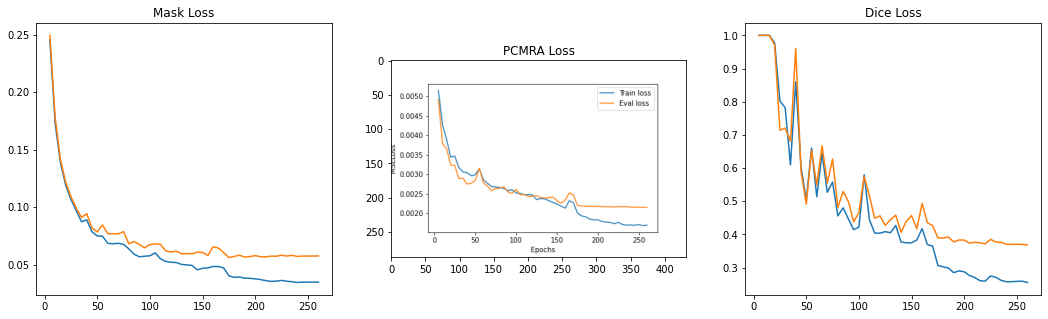






pi-gan 06-05-2021 18:47:19 

reconstruction: pcmra
share_mapping: False
pcmra_lambda: 10
batch_size: 12
n_coords_sample: 20000
cnn_setup: 1
mapping_setup: 2

Lowest train loss at epoch 415:	0.0283
Lowest eval  loss at epoch 230:	0.0581

Lowest train dice loss at epoch 415:	0.2009
Lowest eval  dice loss at epoch 355:	0.3668


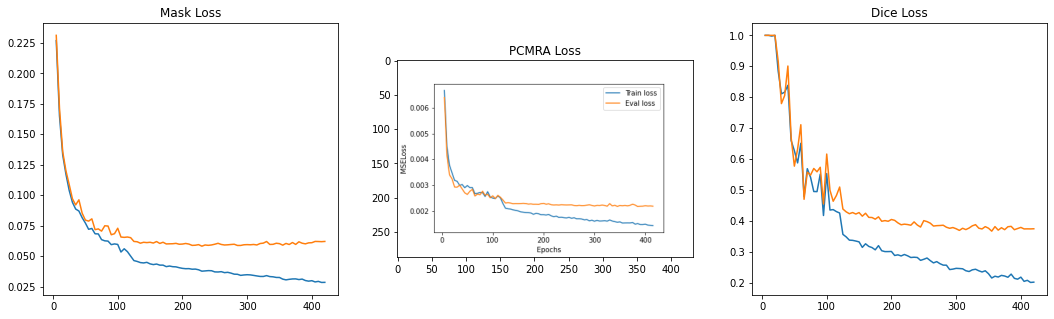






pi-gan 06-05-2021 19:24:41 

reconstruction: pcmra
share_mapping: False
pcmra_lambda: 10
batch_size: 12
n_coords_sample: 20000
cnn_setup: 1
mapping_setup: 2

Lowest train loss at epoch 40:	0.023
Lowest eval  loss at epoch 15:	0.0542

Lowest train dice loss at epoch 40:	0.1839
Lowest eval  dice loss at epoch 30:	0.3381


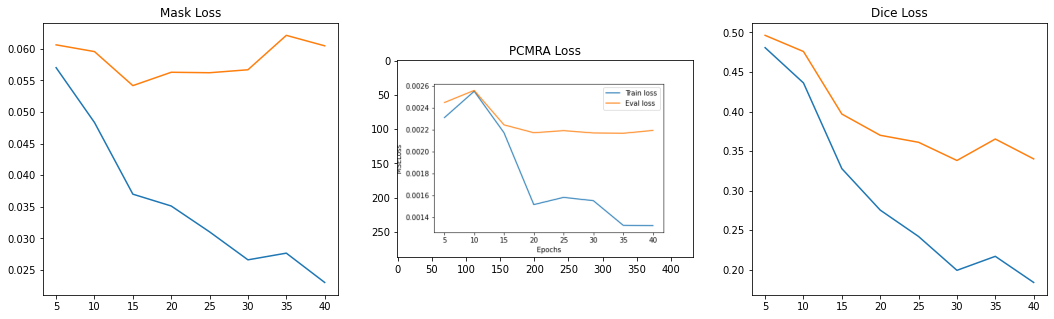






pi-gan 06-05-2021 20:38:47 

reconstruction: pcmra
share_mapping: False
pcmra_lambda: 5
batch_size: 8
n_coords_sample: 20000
cnn_setup: 1
mapping_setup: 2

Lowest train loss at epoch 60:	0.0173
Lowest eval  loss at epoch 20:	0.0522

Lowest train dice loss at epoch 60:	0.1281
Lowest eval  dice loss at epoch 60:	0.3196


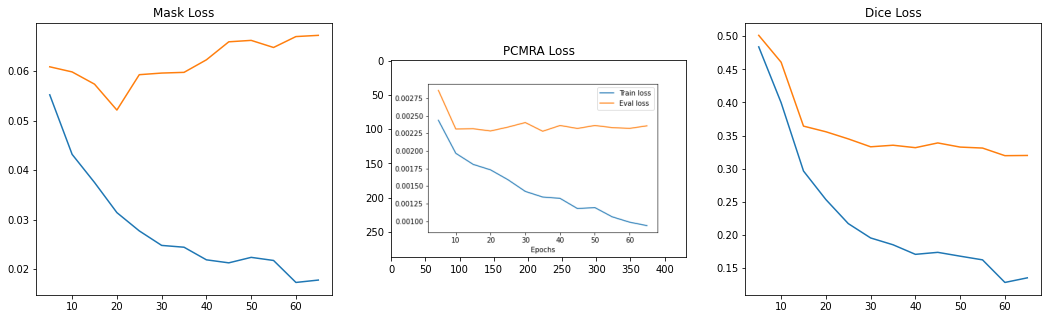






pi-gan 06-05-2021 21:51:33 

reconstruction: pcmra
share_mapping: False
pcmra_lambda: 10
batch_size: 8
n_coords_sample: 20000
cnn_setup: 1
mapping_setup: 2

Lowest train loss at epoch 60:	0.0177
Lowest eval  loss at epoch 20:	0.0547

Lowest train dice loss at epoch 60:	0.1374
Lowest eval  dice loss at epoch 60:	0.317


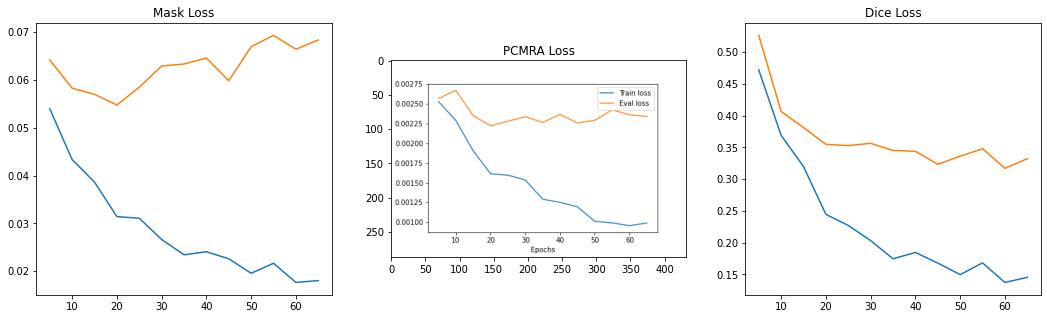






pi-gan 06-05-2021 23:04:28 

reconstruction: pcmra
share_mapping: False
pcmra_lambda: 5
batch_size: 24
n_coords_sample: 5000
cnn_setup: 1
mapping_setup: 2

Lowest train loss at epoch 65:	0.0208
Lowest eval  loss at epoch 35:	0.0551

Lowest train dice loss at epoch 60:	0.1573
Lowest eval  dice loss at epoch 60:	0.315


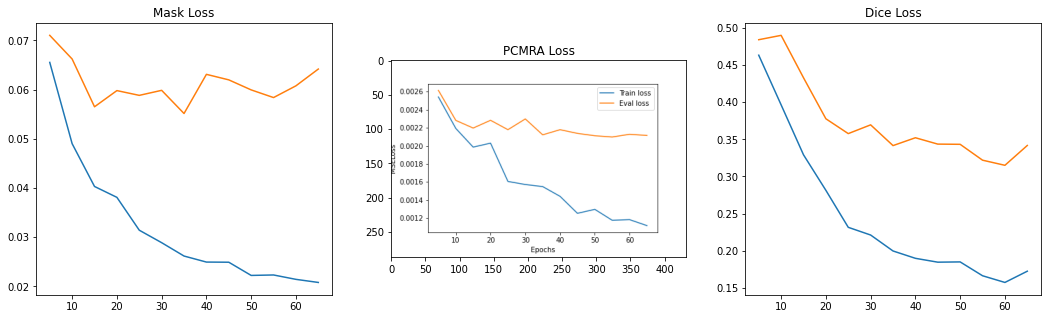






pi-gan 06-05-2021 23:55:21 

reconstruction: pcmra
share_mapping: False
pcmra_lambda: 10
batch_size: 24
n_coords_sample: 5000
cnn_setup: 1
mapping_setup: 2

Lowest train loss at epoch 60:	0.0212
Lowest eval  loss at epoch 15:	0.0545

Lowest train dice loss at epoch 60:	0.1558
Lowest eval  dice loss at epoch 45:	0.323


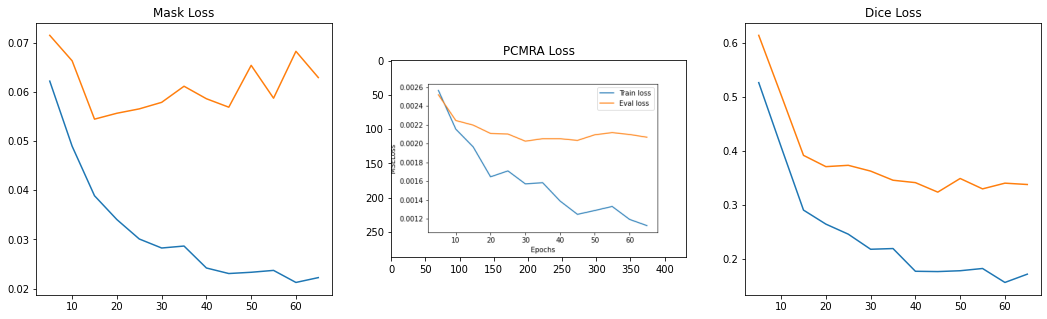

In [16]:
requirements = {"reconstruction": "pcmra"}

print_vars = ["reconstruction", "share_mapping", "pcmra_lambda", "cnn_setup", "mapping_setup", "n_coords_sample", "batch_size"]

show_runs(requirements, print_vars)


PI-GAN 03-05-2021 14:00:17 

reconstruction: both
share_mapping: False
pcmra_lambda: 1
cnn_setup: 1
mapping_setup: 1

Lowest train loss at epoch 50:	0.0207
Lowest eval  loss at epoch 25:	0.0399

Lowest train dice loss at epoch 50:	0.1531
Lowest eval  dice loss at epoch 35:	0.2591


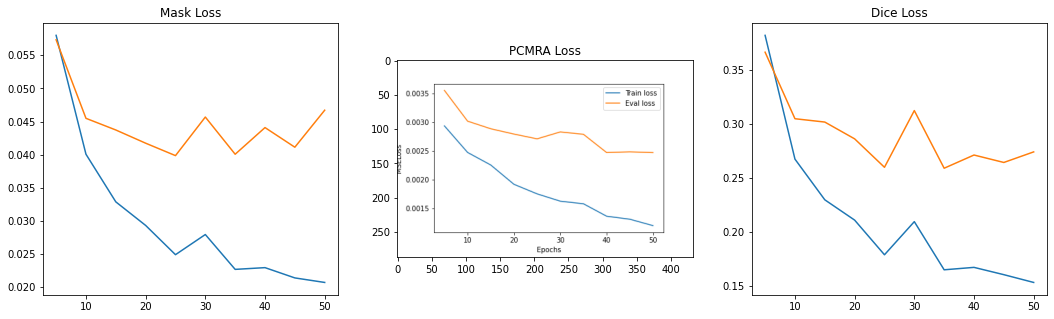






PI-GAN 03-05-2021 14:47:32 

reconstruction: both
share_mapping: False
pcmra_lambda: 10
cnn_setup: 1
mapping_setup: 1

Lowest train loss at epoch 50:	0.0201
Lowest eval  loss at epoch 35:	0.0439

Lowest train dice loss at epoch 50:	0.1434
Lowest eval  dice loss at epoch 40:	0.2799


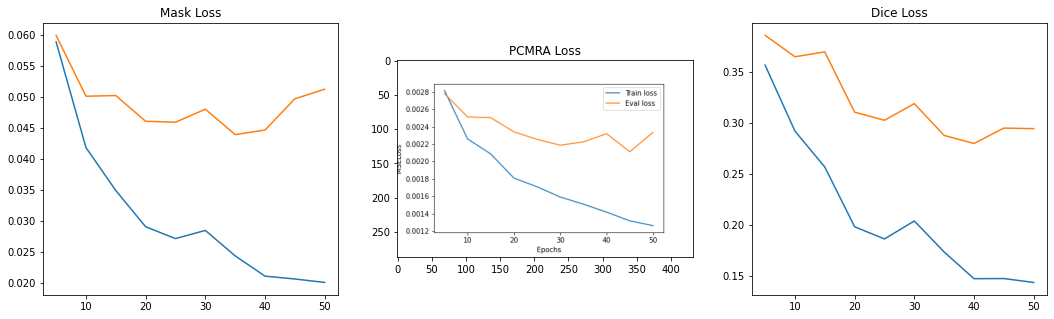






PI-GAN 03-05-2021 18:23:52 

reconstruction: both
share_mapping: True
pcmra_lambda: 1
cnn_setup: 1
mapping_setup: 1

Lowest train loss at epoch 50:	0.0226
Lowest eval  loss at epoch 25:	0.042

Lowest train dice loss at epoch 50:	0.1596
Lowest eval  dice loss at epoch 45:	0.2723


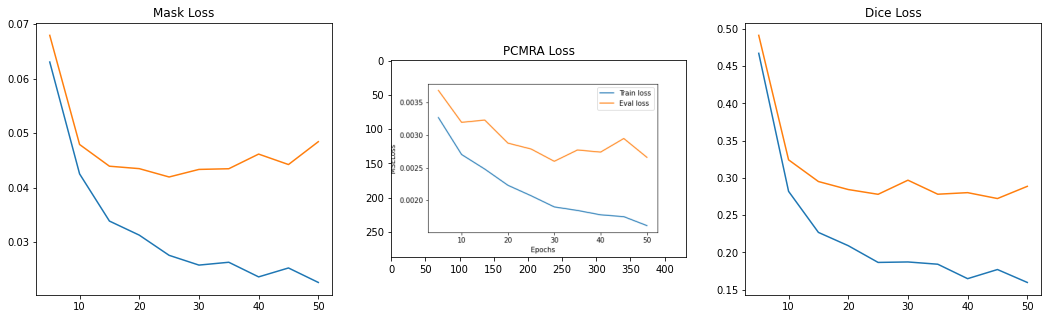






PI-GAN 03-05-2021 19:10:42 

reconstruction: both
share_mapping: True
pcmra_lambda: 10
cnn_setup: 1
mapping_setup: 1

Lowest train loss at epoch 50:	0.021
Lowest eval  loss at epoch 30:	0.0431

Lowest train dice loss at epoch 50:	0.1534
Lowest eval  dice loss at epoch 50:	0.2926


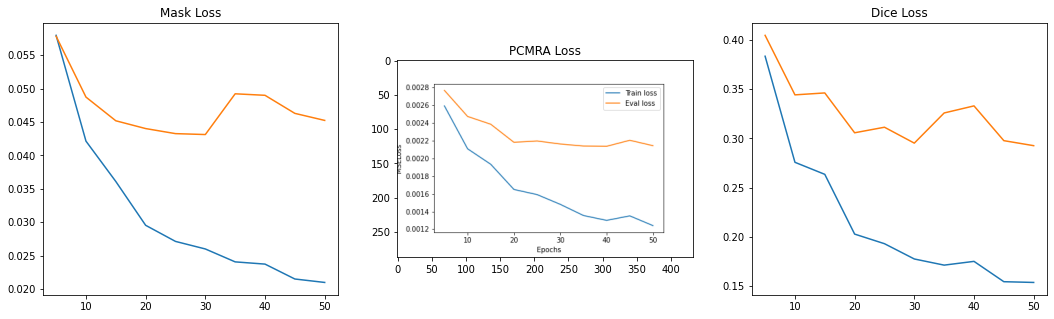






PI-GAN 03-05-2021 22:11:17 

reconstruction: both
share_mapping: False
pcmra_lambda: 1
cnn_setup: 1
mapping_setup: 2

Lowest train loss at epoch 45:	0.0201
Lowest eval  loss at epoch 20:	0.0402

Lowest train dice loss at epoch 45:	0.1496
Lowest eval  dice loss at epoch 40:	0.264


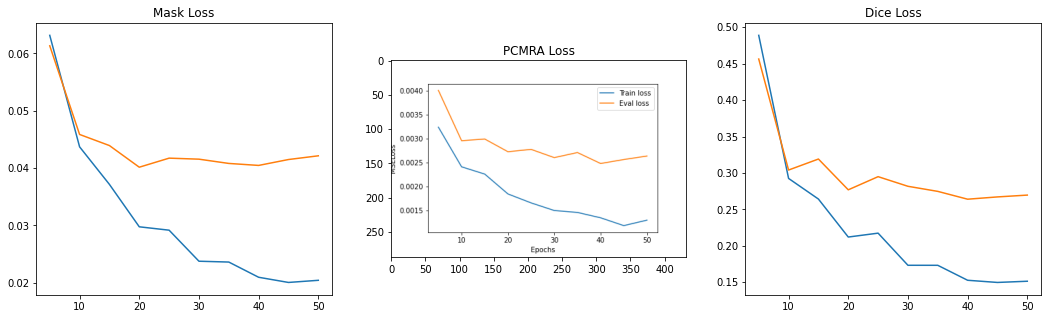






PI-GAN 03-05-2021 22:58:42 

reconstruction: both
share_mapping: False
pcmra_lambda: 10
cnn_setup: 1
mapping_setup: 2

Lowest train loss at epoch 45:	0.0197
Lowest eval  loss at epoch 25:	0.0461

Lowest train dice loss at epoch 45:	0.1482
Lowest eval  dice loss at epoch 45:	0.2879


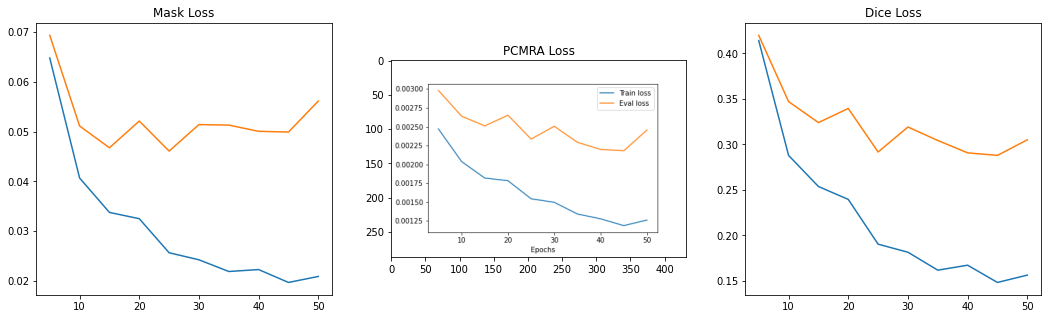






PI-GAN 04-05-2021 02:34:43 

reconstruction: both
share_mapping: True
pcmra_lambda: 1
cnn_setup: 1
mapping_setup: 2

Lowest train loss at epoch 50:	0.0197
Lowest eval  loss at epoch 35:	0.0359

Lowest train dice loss at epoch 50:	0.1433
Lowest eval  dice loss at epoch 50:	0.2524


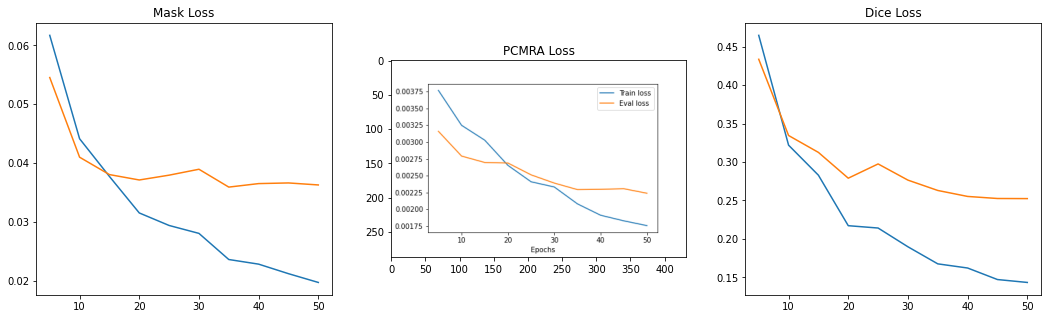






PI-GAN 04-05-2021 03:21:39 

reconstruction: both
share_mapping: True
pcmra_lambda: 10
cnn_setup: 1
mapping_setup: 2

Lowest train loss at epoch 50:	0.02
Lowest eval  loss at epoch 30:	0.0336

Lowest train dice loss at epoch 50:	0.1447
Lowest eval  dice loss at epoch 30:	0.2459


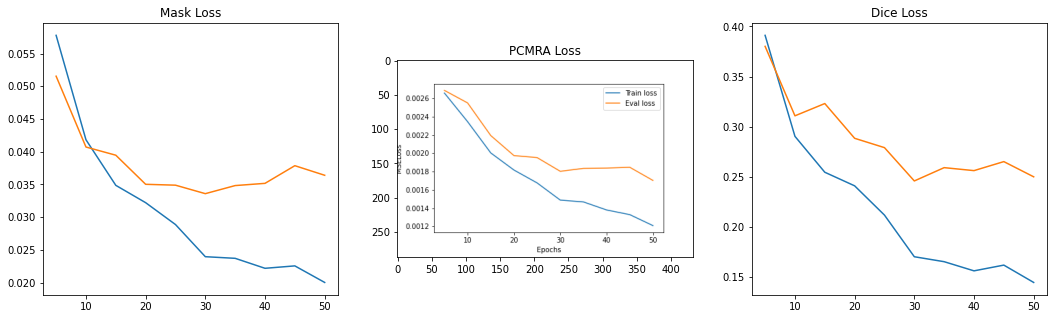






PI-GAN 04-05-2021 06:57:42 

reconstruction: both
share_mapping: False
pcmra_lambda: 1
cnn_setup: 2
mapping_setup: 3

Lowest train loss at epoch 50:	0.0201
Lowest eval  loss at epoch 35:	0.0363

Lowest train dice loss at epoch 45:	0.1407
Lowest eval  dice loss at epoch 30:	0.255


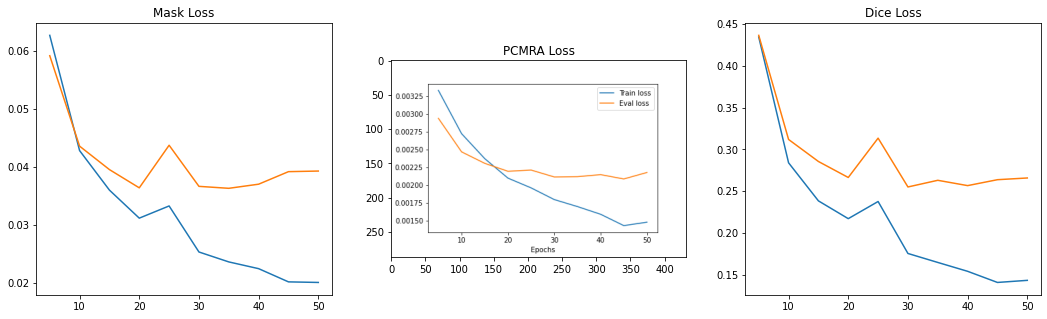






PI-GAN 04-05-2021 07:44:33 

reconstruction: both
share_mapping: False
pcmra_lambda: 10
cnn_setup: 2
mapping_setup: 3

Lowest train loss at epoch 50:	0.0205
Lowest eval  loss at epoch 20:	0.0453

Lowest train dice loss at epoch 50:	0.1445
Lowest eval  dice loss at epoch 50:	0.2871


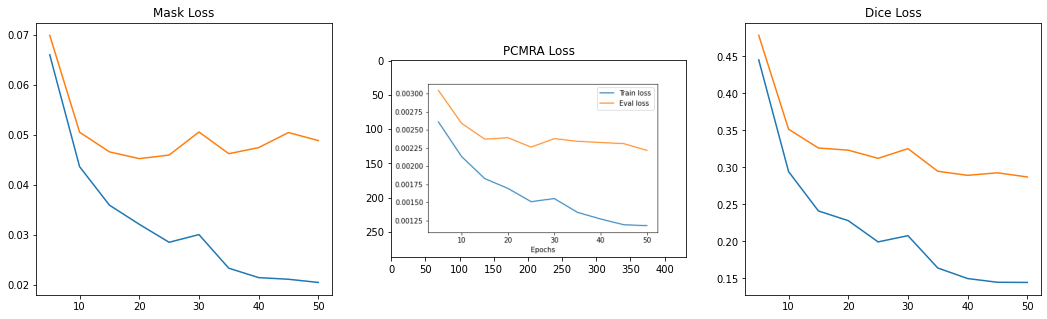






PI-GAN 04-05-2021 11:21:23 

reconstruction: both
share_mapping: True
pcmra_lambda: 1
cnn_setup: 2
mapping_setup: 3

Lowest train loss at epoch 50:	0.0212
Lowest eval  loss at epoch 30:	0.0407

Lowest train dice loss at epoch 50:	0.1518
Lowest eval  dice loss at epoch 40:	0.2726


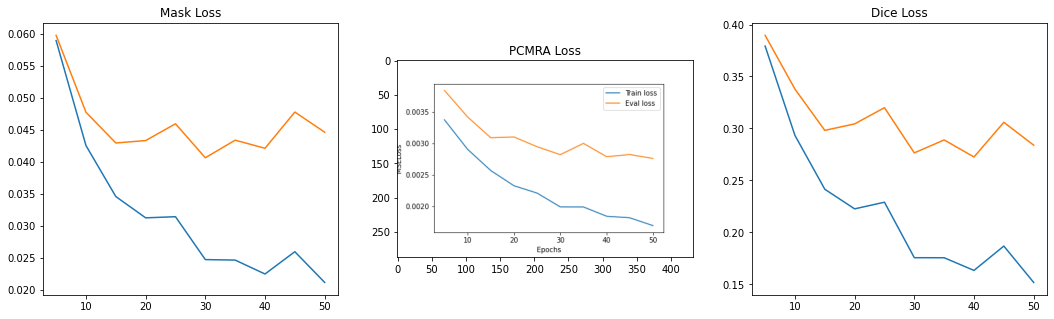






PI-GAN 04-05-2021 12:09:57 

reconstruction: both
share_mapping: True
pcmra_lambda: 10
cnn_setup: 2
mapping_setup: 3

Lowest train loss at epoch 50:	0.0195
Lowest eval  loss at epoch 25:	0.0379

Lowest train dice loss at epoch 50:	0.141
Lowest eval  dice loss at epoch 50:	0.2732


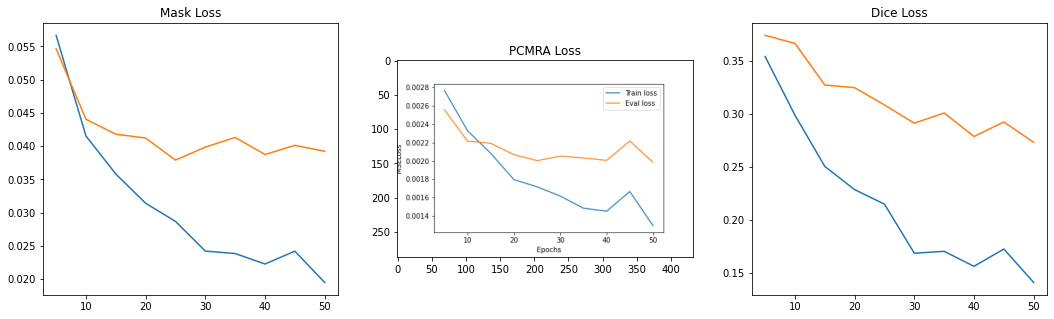






PI-GAN 04-05-2021 15:50:15 

reconstruction: both
share_mapping: False
pcmra_lambda: 1
cnn_setup: 2
mapping_setup: 4

Lowest train loss at epoch 50:	0.0203
Lowest eval  loss at epoch 20:	0.0414

Lowest train dice loss at epoch 50:	0.1439
Lowest eval  dice loss at epoch 50:	0.2642


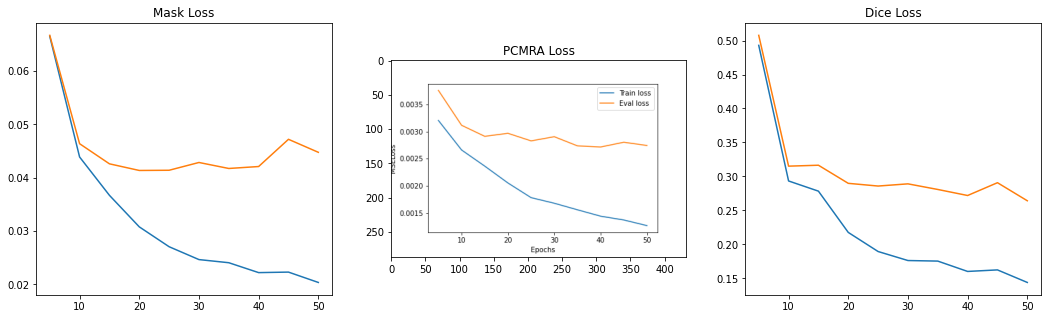






PI-GAN 04-05-2021 16:38:07 

reconstruction: both
share_mapping: False
pcmra_lambda: 10
cnn_setup: 2
mapping_setup: 4

Lowest train loss at epoch 45:	0.02
Lowest eval  loss at epoch 40:	0.037

Lowest train dice loss at epoch 45:	0.1494
Lowest eval  dice loss at epoch 45:	0.2641


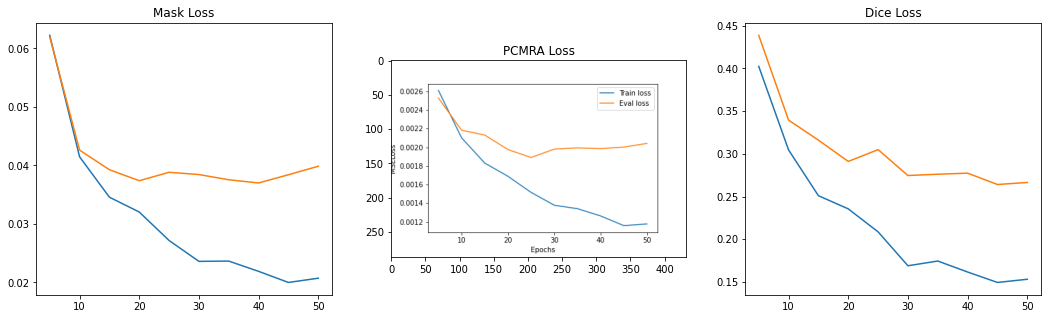






PI-GAN 04-05-2021 20:17:53 

reconstruction: both
share_mapping: True
pcmra_lambda: 1
cnn_setup: 2
mapping_setup: 4

Lowest train loss at epoch 45:	0.0216
Lowest eval  loss at epoch 40:	0.0429

Lowest train dice loss at epoch 45:	0.1492
Lowest eval  dice loss at epoch 45:	0.2739


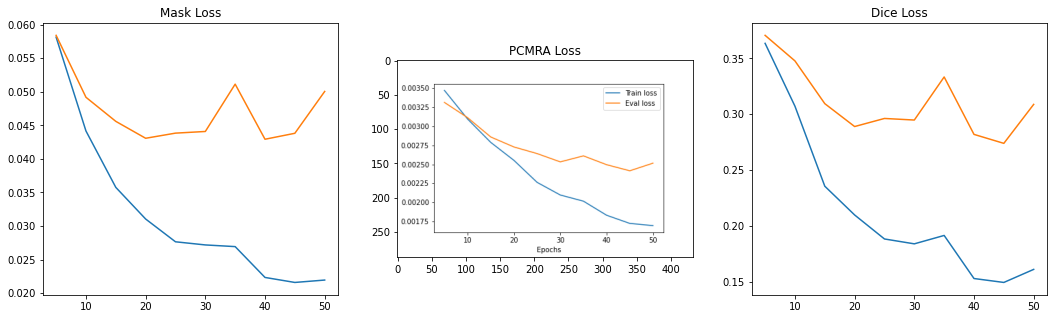






PI-GAN 04-05-2021 21:05:08 

reconstruction: both
share_mapping: True
pcmra_lambda: 10
cnn_setup: 2
mapping_setup: 4

Lowest train loss at epoch 50:	0.0198
Lowest eval  loss at epoch 25:	0.0417

Lowest train dice loss at epoch 50:	0.1415
Lowest eval  dice loss at epoch 45:	0.275


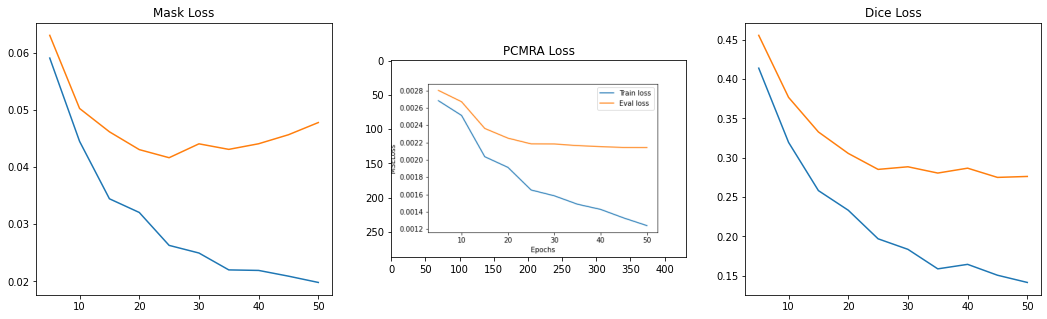

In [8]:
requirements = {"reconstruction": "both"}

print_vars = ["reconstruction", "share_mapping", "pcmra_lambda", "cnn_setup", "mapping_setup"]

show_runs(requirements, print_vars)


PI-GAN 03-05-2021 15:34:40 

reconstruction: mask
share_mapping: False
pcmra_lambda: 1
cnn_setup: 1
mapping_setup: 1

Lowest train loss at epoch 50:	0.0196
Lowest eval  loss at epoch 25:	0.038

Lowest train dice loss at epoch 50:	0.1426
Lowest eval  dice loss at epoch 45:	0.253


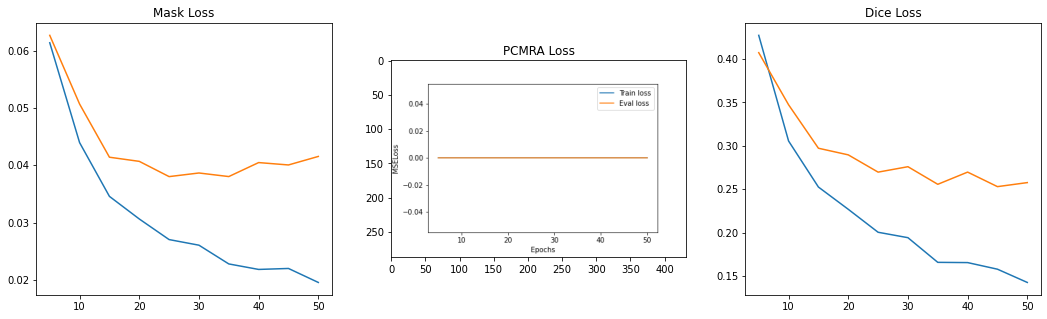






PI-GAN 03-05-2021 23:46:00 

reconstruction: mask
share_mapping: False
pcmra_lambda: 1
cnn_setup: 1
mapping_setup: 2

Lowest train loss at epoch 50:	0.0207
Lowest eval  loss at epoch 25:	0.0402

Lowest train dice loss at epoch 45:	0.1532
Lowest eval  dice loss at epoch 45:	0.2554


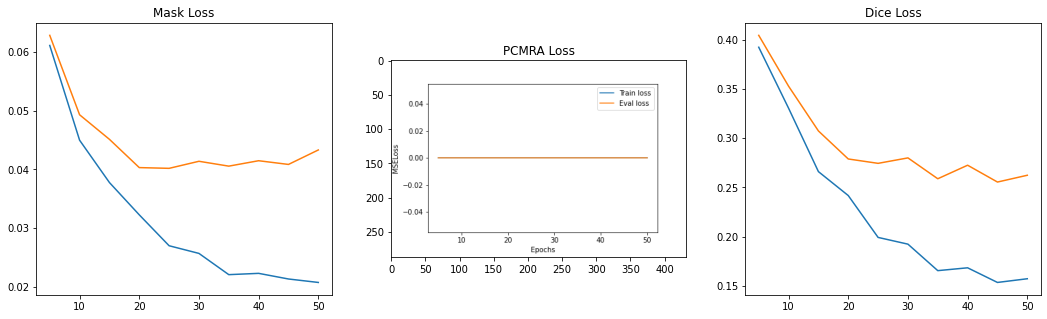






PI-GAN 04-05-2021 08:31:23 

reconstruction: mask
share_mapping: False
pcmra_lambda: 1
cnn_setup: 2
mapping_setup: 3

Lowest train loss at epoch 45:	0.0212
Lowest eval  loss at epoch 35:	0.0359

Lowest train dice loss at epoch 45:	0.1431
Lowest eval  dice loss at epoch 35:	0.2493


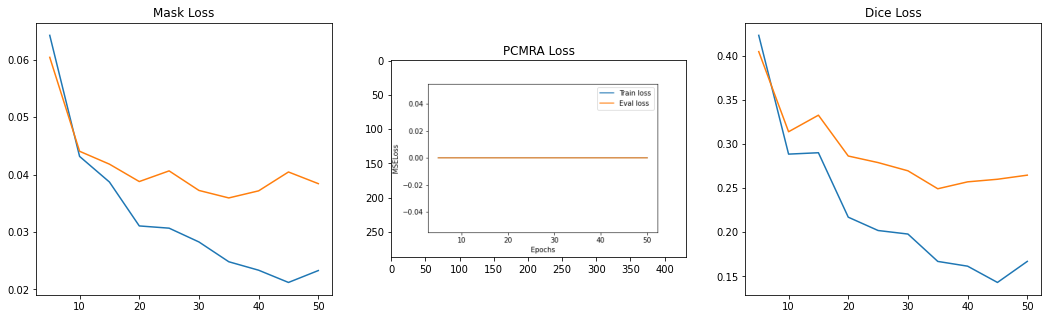






PI-GAN 04-05-2021 17:25:59 

reconstruction: mask
share_mapping: False
pcmra_lambda: 1
cnn_setup: 2
mapping_setup: 4

Lowest train loss at epoch 50:	0.0201
Lowest eval  loss at epoch 30:	0.0345

Lowest train dice loss at epoch 50:	0.1402
Lowest eval  dice loss at epoch 50:	0.2487


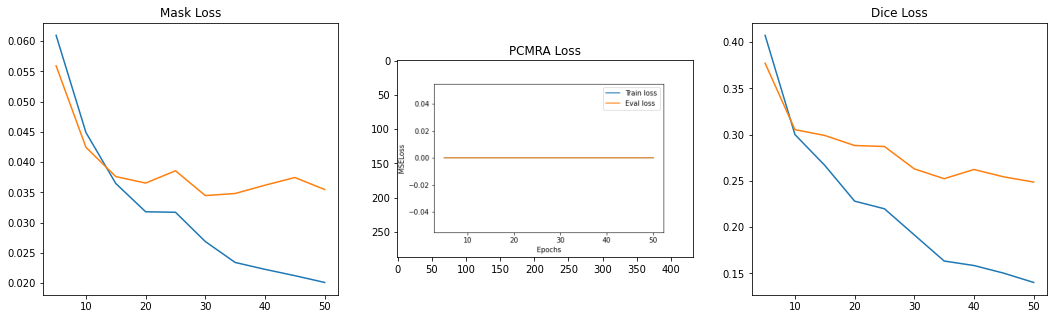

In [12]:
requirements = {"reconstruction": "mask", "pcmra_lambda": 1, "share_mapping": False}

print_vars = ["reconstruction", "share_mapping", "pcmra_lambda", "cnn_setup", "mapping_setup"]

show_runs(requirements, print_vars)